In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_lowercase

import warnings
import gc
warnings.filterwarnings("ignore")

import torch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

# 데이터 읽기

In [2]:
train = pd.read_csv('NewDataSet/train.csv')
test= pd.read_csv('NewDataSet/test_x.csv')

# EDA - CHART

In [3]:
eda_train = pd.read_csv('NewDataSet/train.csv')
voted = eda_train[eda_train['voted']==1]
unvoted = eda_train[eda_train['voted']==2]

In [4]:
sns.countplot(eda_train['voted'])

<AxesSubplot:xlabel='voted', ylabel='count'>

# 마키아벨리즘 응답별 투표율

In [5]:
QA_columns = list(eda_train.loc[:, train.columns[1:41:2]].columns)
eda_train_QA = eda_train.loc[:,QA_columns]
display(eda_train_QA.head())
display(eda_train_QA.describe())

QaA  QbA  QcA  QdA  QeA  QfA  QgA  QhA  QiA  QjA  QkA  QlA  QmA  QnA  QoA  \
0    3    4    5    1    2    5    2    4    5    4    4    4    2    5    2   
1    5    5    3    5    1    3    1    1    5    3    5    4    1    5    1   
2    4    1    1    4    5    1    4    1    3    2    5    5    2    4    2   
3    3    3    4    3    1    2    4    3    5    4    3    4    4    4    4   
4    1    1    5    2    1    2    1    1    5    5    5    5    4    2    1   

   QpA  QqA  QrA  QsA  QtA  
0    2    2    2    2    1  
1    5    5    1    4    1  
2    1    5    4    1    1  
3    4    3    4    4    5  
4    4    5    5    1    2

QaA           QbA           QcA           QdA           QeA  \
count  37532.000000  37532.000000  37532.000000  37532.000000  37532.000000   
mean       2.130156      2.900618      3.658158      1.749600      2.318848   
std        1.196203      1.566697      1.431909      1.043341      1.367990   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        2.000000      3.000000      4.000000      1.000000      2.000000   
75%        3.000000      4.000000      5.000000      2.000000      3.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                QfA           QgA           QhA           QiA           QjA  \
count  37532.000000  37532.000000  37532.000000  37532.000000  37532.000000   
mean       2.168763      2.562427      2.313333      3.165805      3.570926   
std        1.347499      1.508661      1.460001      1.480786      1.362964   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      1.000000      2.000000      2.000000   
50%        2.000000      2.000000      2.000000      3.000000      4.000000   
75%        3.000000      4.000000      4.000000      5.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                QkA           QlA           QmA           QnA           QoA  \
count  37532.000000  37532.000000  37532.000000  37532.000000  37532.000000   
mean       3.815757      4.319860      3.509166      2.634525      3.211793   
std        1.371740      1.153312      1.375647      1.472889      1.475940   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      4.000000      2.000000      1.000000      2.000000   
50%        4.000000      5.000000      4.000000      2.000000      4.000000   
75%        5.000000      5.000000      5.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                QpA           QqA           QrA           QsA           QtA  
count  37532.000000  37532.000000  37532.000000  37532.000000  37532.000000  
mean       3.069541      2.844693      2.824523      3.431738      3.224821  
std        1.489856      1.404569      1.424616      1.376211      1.521413  
min        1.000000      1.000000      1.000000      1.000000      1.000000  
25%        2.000000      2.000000      2.000000      2.000000      2.000000  
50%        3.000000      3.000000      3.000000      4.000000      4.000000  
75%        4.000000      4.000000      4.000000      5.000000      5.000000  
max        5.000000      5.000000      5.000000      5.000000      5.000000

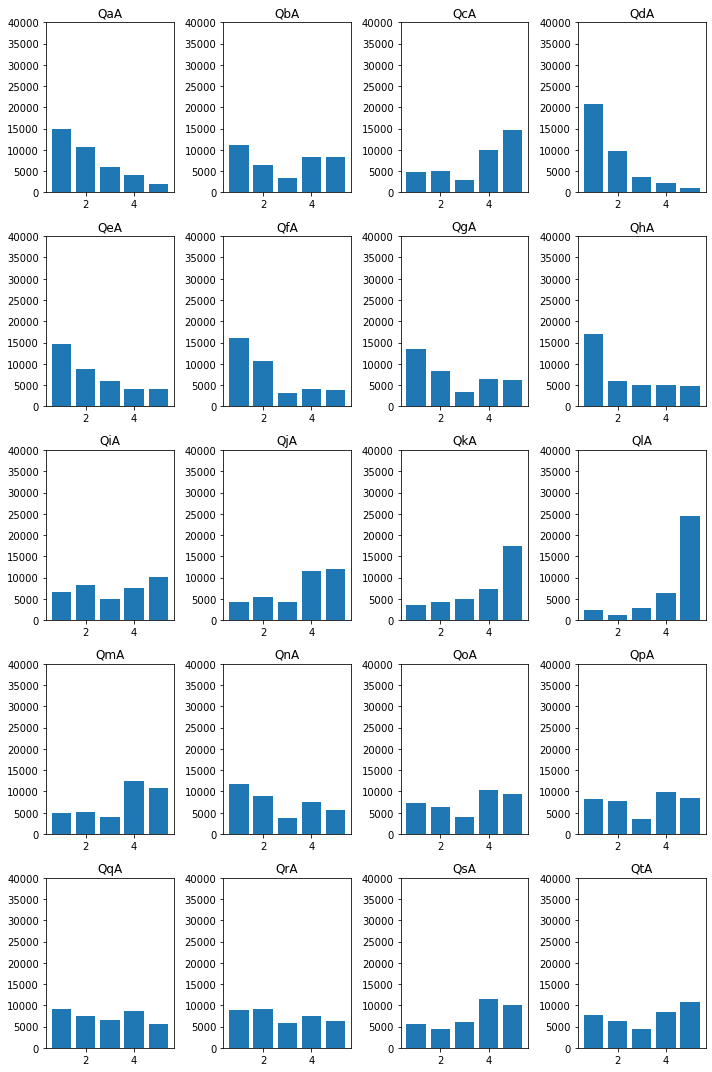

In [6]:
fig,ax = plt.subplots(5,4, figsize=(10,15))

for i in range(20):
    x_num = i//4
    y_num = i%4

    plot_dict = eda_train_QA.iloc[:,i].value_counts().to_dict()
    x_values = sorted(plot_dict.keys())
    y_values = [plot_dict[x] for x in x_values]
    
    ax[x_num, y_num].bar(x_values, y_values)
    ax[x_num, y_num].set_title(eda_train_QA.columns[i])
    ax[x_num, y_num].set_ylim(0,40000)
plt.tight_layout()
plt.show()

QaA


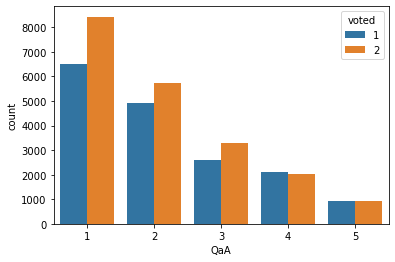

QbA


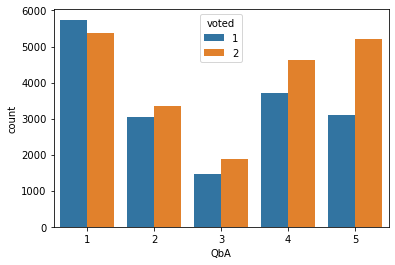

QcA


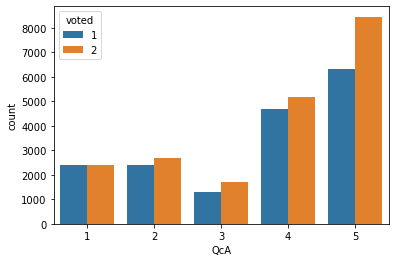

QdA


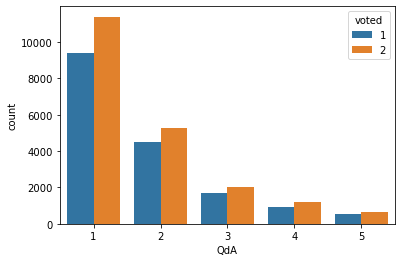

QeA


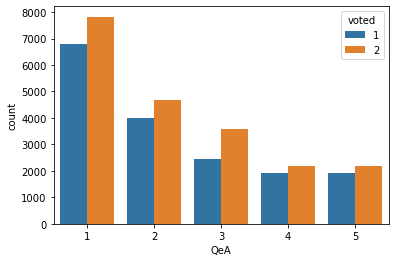

QfA


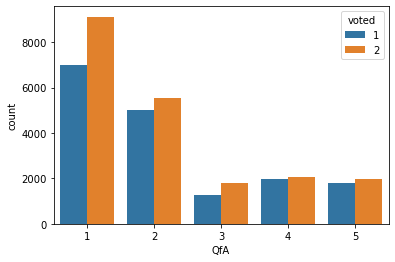

QgA


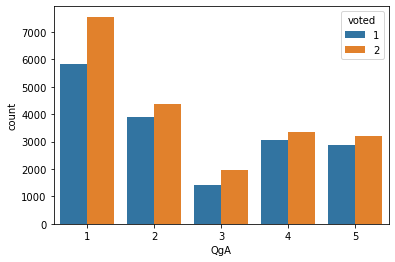

QhA


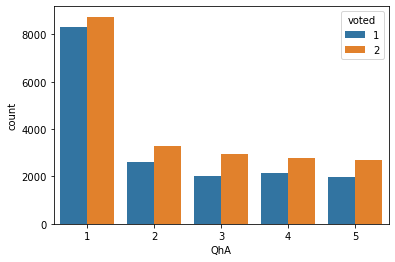

QiA


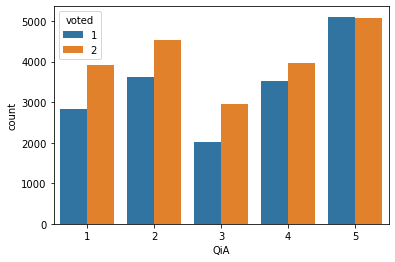

QjA


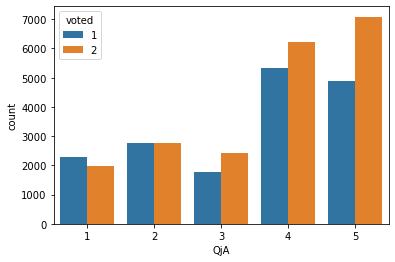

QkA


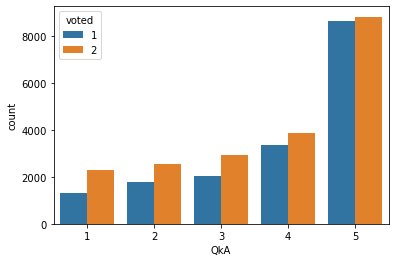

QlA


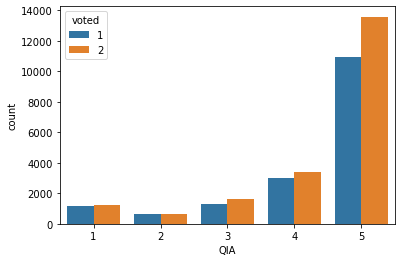

QmA


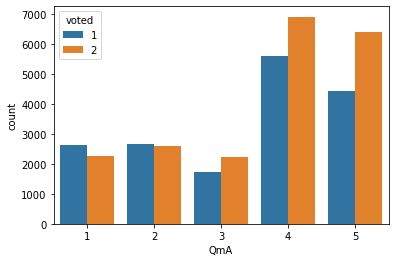

QnA


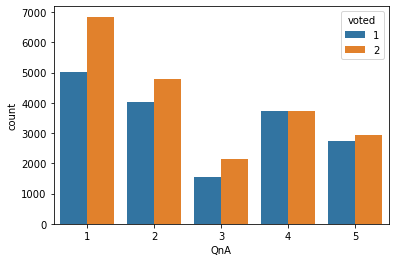

QoA


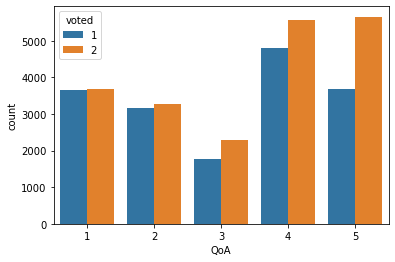

QpA


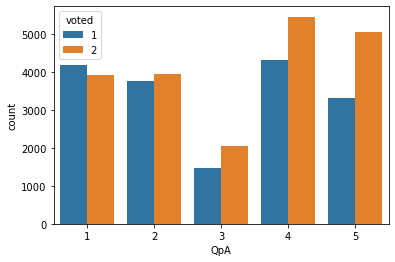

QqA


QrA


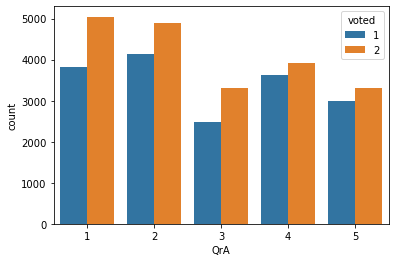

QsA


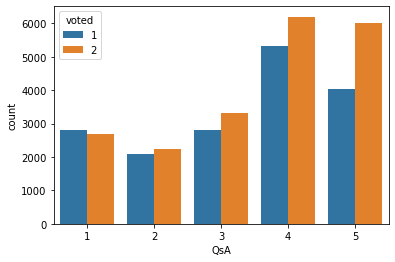

QtA


In [7]:
y_an=voted.iloc[:,1:41:2]
n_an=unvoted.iloc[:,1:41:2]
for key in n_an.columns:
  print(key)
  sns.countplot(data = eda_train, x=key,hue=eda_train['voted'])
  plt.show()

# 마키아벨리즘 테스트 스코어 상관관계

In [8]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [9]:
plt.figure(figsize=(8,8))
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, annot=True, fmt='.1f', cmap="coolwarm", square=True, center=0)

<AxesSubplot:>

# 마키아벨리즘 테스트에 correalation 적용후 히트맵

<AxesSubplot:>

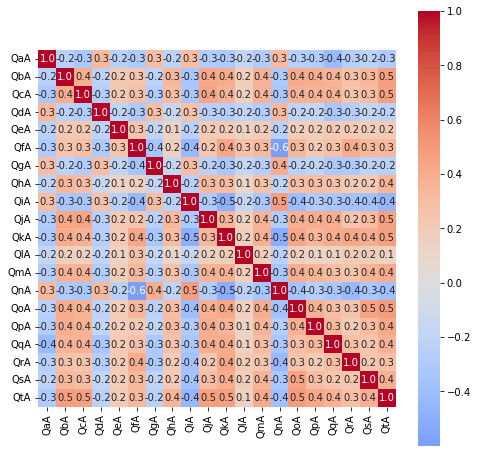

In [10]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    eda_train[flip] = 6 - eda_train[flip]
    
plt.figure(figsize=(8,8))
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, annot=True, fmt='.1f', cmap="coolwarm", square=True, center=0)

# 마키아벨리즘 응답시간별 투표율

In [11]:
eda_train = pd.read_csv('NewDataSet/train.csv')
QE_columns = list(eda_train.loc[:, eda_train.columns[2:41:2]].columns)
eda_train_QE = eda_train.loc[:,QE_columns]
display(eda_train_QE.head())
display(eda_train_QE.describe())

QaE   QbE   QcE   QdE   QeE   QfE   QgE   QhE   QiE   QjE   QkE   QlE  \
0   363  1370   997  1024  1577   539   586  1095  1142  1287   883   851   
1   647  1313  3387  2969  4320  2190   826  4082  1867  1264  2943  3927   
2  1623  1480  1021  3374  1333   531  1167  1016  2653  1569   998  2547   
3   504  2311   992  3245   357  1519   159  2275  2809  5614  3219  1296   
4   927   707   556  1062  1014   628   991  1259  1153  1388   740  1181   

    QmE   QnE   QoE    QpE   QqE   QrE   QsE   QtE  
0   851   816   579    924   366   876   633  1115  
1  4329  1828  1214   2414  1356  3039  4304  1346  
2   918  2153  1304   1131   937  1327  1170  1409  
3  9046  1216  1169  23868   581  8830  2392  1312  
4   547   575   754   1140   323  1070   583  1889

QaE           QbE            QcE            QdE           QeE  \
count  3.753200e+04  3.753200e+04   37532.000000   37532.000000  3.753200e+04   
mean   9.738477e+02  2.260857e+03    1478.238623    1456.859480  1.919709e+03   
std    1.434642e+04  3.680737e+04    9188.785160    8298.462568  1.785482e+04   
min    2.500000e+01  2.500000e+01      25.000000      26.000000  2.500000e+01   
25%    4.040000e+02  8.760000e+02     652.000000     678.000000  8.330000e+02   
50%    5.560000e+02  1.218000e+03     900.000000     931.000000  1.152000e+03   
75%    8.280000e+02  1.837000e+03    1336.000000    1356.000000  1.654000e+03   
max    2.413960e+06  5.580395e+06  871557.000000  893392.000000  1.919926e+06   

                QfE           QgE           QhE           QiE           QjE  \
count  3.753200e+04  3.753200e+04  3.753200e+04  3.753200e+04  3.753200e+04   
mean   2.018492e+03  1.300948e+03  5.114681e+03  3.777255e+03  2.596432e+03   
std    8.379012e+04  1.022374e+04  5.529401e+05  8.637287e+04  5.904716e+04   
min    2.500000e+01  2.500000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.040000e+02  5.490000e+02  1.076000e+03  1.258000e+03  9.000000e+02   
50%    7.110000e+02  7.710000e+02  1.460000e+03  1.804500e+03  1.261000e+03   
75%    1.074000e+03  1.149000e+03  2.089000e+03  2.764000e+03  1.899000e+03   
max    1.176370e+07  1.068252e+06  1.070860e+08  1.152415e+07  9.910006e+06   

                QkE           QlE           QmE            QnE           QoE  \
count  3.753200e+04  3.753200e+04  3.753200e+04   37532.000000  3.753200e+04   
mean   1.990302e+03  4.153012e+03  2.181173e+03     974.675504  1.459192e+03   
std    2.282872e+04  4.034087e+05  8.290677e+04    6319.268790  1.185380e+04   
min    0.000000e+00  2.500000e+01  2.500000e+01      25.000000  0.000000e+00   
25%    8.610000e+02  8.060000e+02  6.510000e+02     428.000000  6.390000e+02   
50%    1.178000e+03  1.125000e+03  9.070000e+02     598.000000  8.830000e+02   
75%    1.720000e+03  1.652000e+03  1.346000e+03     891.000000  1.298000e+03   
max    3.098699e+06  7.754351e+07  1.410832e+07  606694.000000  1.309739e+06   

                QpE           QqE           QrE           QsE           QtE  
count  3.753200e+04  3.753200e+04  3.753200e+04  3.753200e+04  3.753200e+04  
mean   1.613578e+03  1.192534e+03  2.588430e+03  1.172954e+03  2.293476e+03  
std    2.727764e+04  2.472126e+04  1.632624e+05  8.008207e+03  7.335536e+04  
min    0.000000e+00  0.000000e+00  2.500000e+01  2.500000e+01  2.500000e+01  
25%    7.050000e+02  4.620000e+02  7.930000e+02  5.260000e+02  7.320000e+02  
50%    9.690000e+02  6.525000e+02  1.115000e+03  7.470000e+02  1.018000e+03  
75%    1.408000e+03  9.830000e+02  1.660000e+03  1.126000e+03  1.522000e+03  
max    4.650742e+06  4.277510e+06  3.159328e+07  1.286581e+06  1.155650e+07

# 응답시간에 10승루트 해주었을때 스코어 변화율

<AxesSubplot:xlabel='delay', ylabel='Density'>

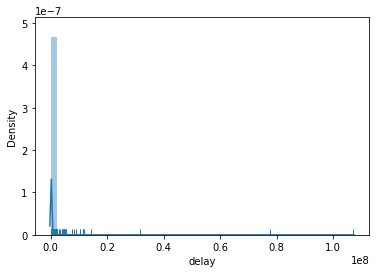

In [12]:
questions = [i for i in list(ascii_lowercase)[:20]]
eda_train['delay'] = eda_train[[('Q'+i+'E') for i in questions]].sum(axis=1)

# 10승루트 안해줬을때
sns.distplot(eda_train['delay'], rug = True)

<AxesSubplot:xlabel='delay', ylabel='Density'>

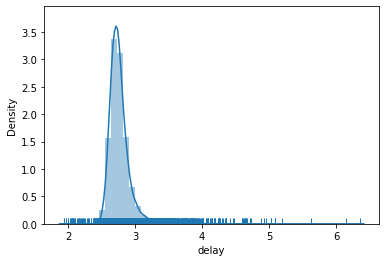

In [13]:
# 10승루트 해줬을때
eda_train['delay'] = eda_train['delay'] ** (1/10)
sns.distplot(eda_train['delay'], rug = True)

# 연령에 따른 투표율

<BarContainer object of 7 artists>

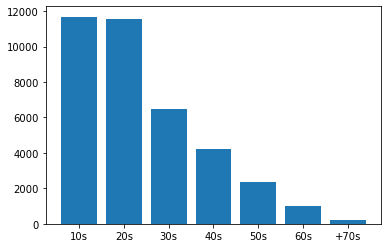

In [14]:
x = eda_train.age_group.value_counts().index
y = eda_train.age_group.value_counts()
plt.bar(x,y)

<AxesSubplot:xlabel='age_group', ylabel='count'>

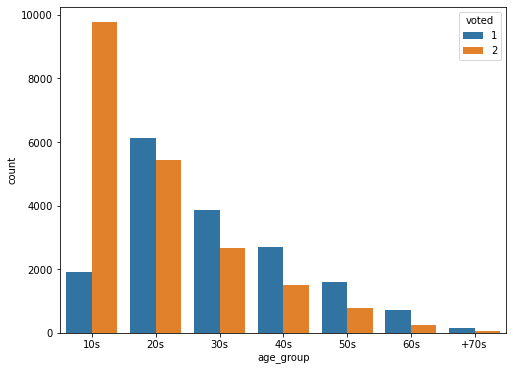

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'age_group', hue = eda_train['voted'], order=['10s', '20s','30s','40s', '50s','60s','+70s'])

# 결혼 여부에 따른 투표율

<BarContainer object of 4 artists>

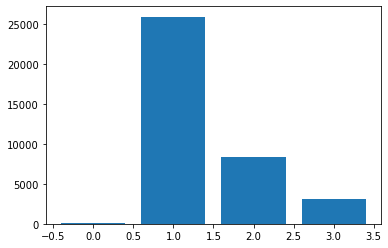

In [16]:
x = eda_train.married.value_counts().index
y = eda_train.married.value_counts()
plt.bar(x,y)

<AxesSubplot:xlabel='married', ylabel='count'>

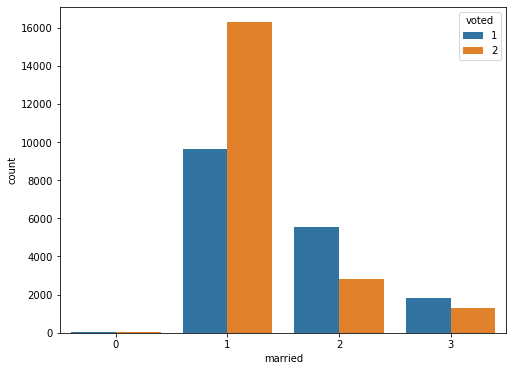

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'married', hue = eda_train['voted'])

# 성별에 따른 투표율

<AxesSubplot:xlabel='gender', ylabel='count'>

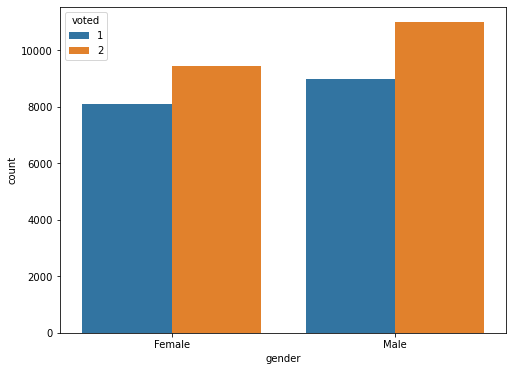

In [18]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'gender', hue = eda_train['voted'])

# 인종에 따른 투표율

<AxesSubplot:xlabel='count', ylabel='race'>

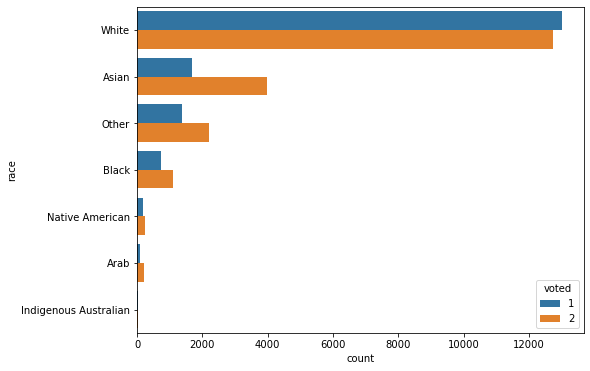

In [19]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, y = 'race', hue = eda_train['voted'])

# 종교에 따른 투표율

<AxesSubplot:xlabel='count', ylabel='religion'>

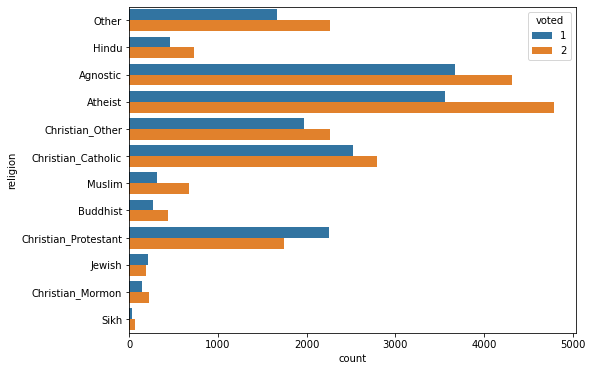

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, y = 'religion', hue = eda_train['voted'])

# 지역에 따른 투표율

<AxesSubplot:xlabel='urban', ylabel='count'>

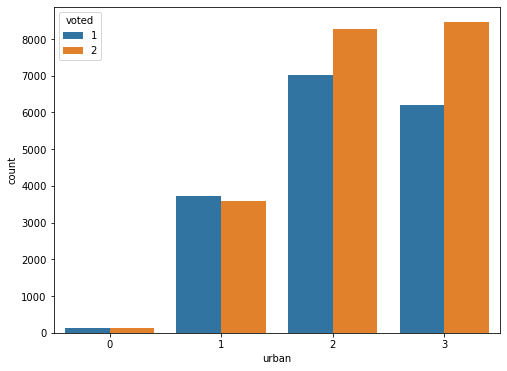

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'urban', hue = eda_train['voted'])

# 교육 수준에 따른 투표율

<AxesSubplot:xlabel='education', ylabel='count'>

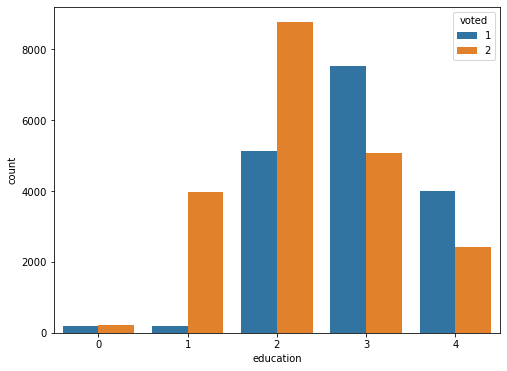

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'education', hue = eda_train['voted'])

# 주로사용하는 손에 따른 투표율

<AxesSubplot:xlabel='hand', ylabel='count'>

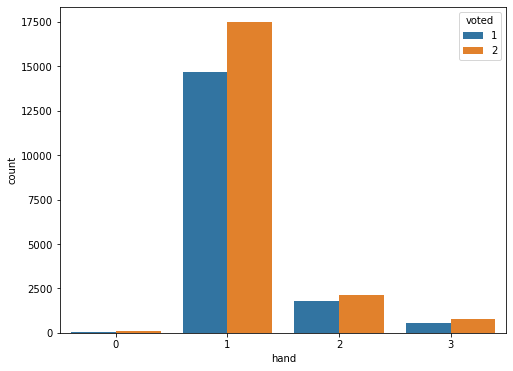

In [23]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'hand', hue = eda_train['voted'])

# 모국어에 따른 투표율

<AxesSubplot:xlabel='engnat', ylabel='count'>

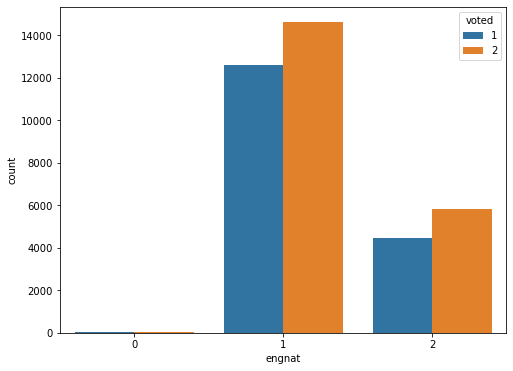

In [24]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'engnat', hue = eda_train['voted'])

# 가족 수에 따른 투표율

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'familysize', hue = eda_train['voted'])

<AxesSubplot:xlabel='familysize', ylabel='count'>

# 실존하는 해당 단어의 정의를 아는 경우에 따른 투표율

In [26]:
def set_count(row):
    row['know_count'] = len([x for x in row.values.tolist() if x == 1])
    return row;

know_count_df = eda_train.loc[:, 'wr_01': 'wr_13'].apply(set_count, axis=1)

In [27]:
know_count_df = know_count_df.assign(voted=eda_train['voted'])

In [28]:
ax = know_count_df.groupby('know_count')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
plt.show()

# 데이터 전처리

In [29]:
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate

In [30]:
index = test['index']

# 마키아벨리즘 SCORE 계산

In [31]:
March_answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

#train 셋 적용
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]
    
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]
    
train['Mach_score'] = train[March_answers].mean(axis = 1)

# test 셋 적용
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    test[flip] = 6 - test[flip]
    
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip]

test['Mach_score'] = test[March_answers].mean(axis = 1)

# TIPI SCORE 계산

In [32]:
flipping_columns2 = ['tp02', 'tp04', 'tp06', 'tp08', 'tp10']
for flip in flipping_columns2: 
    train[flip] = 8 - train[flip]
    
train['Ex'] = train['tp01'] + train['tp06'] 
train['Ag'] = train['tp02'] + train['tp07']
train['Co'] = train['tp03'] + train['tp08']
train['Em'] = train['tp04'] + train['tp09'] 
train['Op'] = train['tp05'] + train['tp10']

flipping_columns2 = ['tp02', 'tp04', 'tp06', 'tp08', 'tp10']
for flip in flipping_columns2: 
    test[flip] = 8 - test[flip]
    
test['Ex'] = test['tp01'] + test['tp06'] 
test['Ag'] = test['tp02'] + test['tp07']
test['Co'] = test['tp03'] + test['tp08']
test['Em'] = test['tp04'] + test['tp09'] 
test['Op'] = test['tp05'] + test['tp10']

# 원핫 인코딩

In [33]:
# 명목형 변수
replace_dict = {'education': str, 'engnat': str, 'married': str, 'urban': str}

# 드랍시킬 컬럼
drop_list = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE'
             , 'hand', 'index']

# 10 이상 값 10으로 대치
train.loc[train['familysize'] > 10, 'familysize'] = 10
test.loc[train['familysize'] > 10, 'familysize'] = 10

# train 셋 분리 => train_y : 투표 / train_x, test_x : 인코딩한 train셋, test셋
train_y = train['voted']
train_x = train.drop(drop_list + ['voted'], axis=1)
test_x = test.drop(drop_list , axis=1)

# tarin_x / test_x 원핫 인코딩
train_x = train_x.astype(replace_dict)
test_x = test_x.astype(replace_dict)
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)


# 전처리 이후 확인 가능한 EDA

In [34]:
eda_train = train.copy()

# 마키아벨리즘 SCORE에 따른 투표율

<AxesSubplot:xlabel='Mach_score', ylabel='count'>

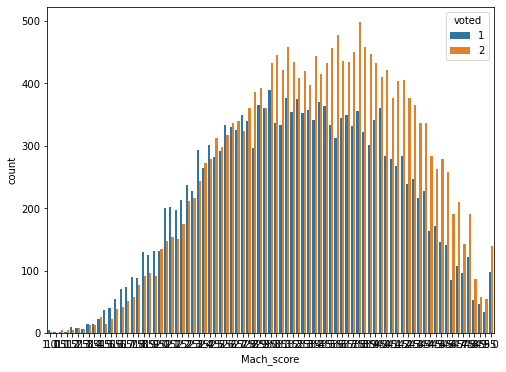

In [35]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'Mach_score', hue = eda_train['voted'])

# TIPI SCORE에 따른 투표율

In [36]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'Ex', hue = eda_train['voted'])

<AxesSubplot:xlabel='Ex', ylabel='count'>

<AxesSubplot:xlabel='Ag', ylabel='count'>

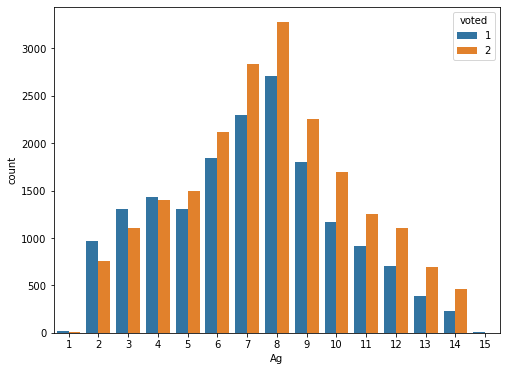

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'Ag', hue = eda_train['voted'])

<AxesSubplot:xlabel='Co', ylabel='count'>

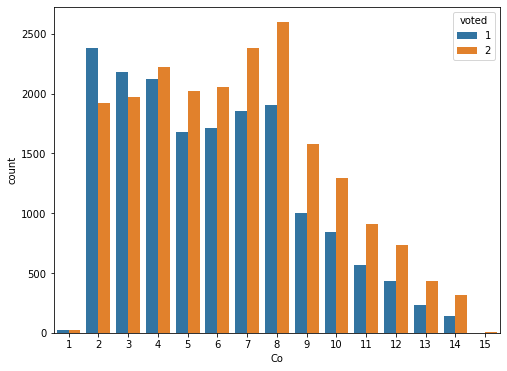

In [38]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'Co', hue = eda_train['voted'])

In [39]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'Em', hue = eda_train['voted'])

<AxesSubplot:xlabel='Em', ylabel='count'>

<AxesSubplot:xlabel='Op', ylabel='count'>

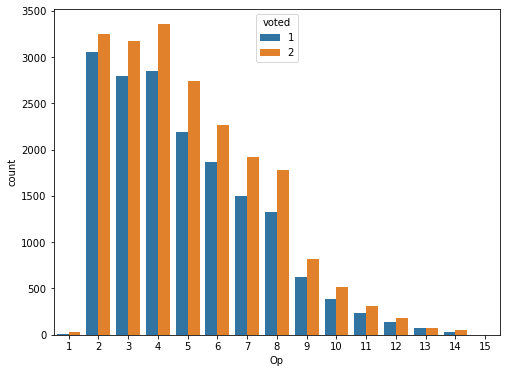

In [40]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'Op', hue = eda_train['voted'])

# LGBM - Model1

In [41]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [42]:
def lgbm_rfe_4040(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=4040)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)        
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [43]:
def lgbm_rfe_1234(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=1234)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [44]:
def lgbm_rfe_99087(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=99087)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [45]:
def lgbm_rfe_42(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=42)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [46]:
lgbm_archive_4040 = lgbm_rfe_4040(train_x, train_y)

97 0.7702380126044268
87 0.769318185256703
78 0.7691592338828029
70 0.7684727216610607
63 0.768727309771608
56 0.7662939829271462
50 0.7659342219144567
45 0.7677257831598836
40 0.7661936010312262


In [47]:
lgbm_archive_1234 = lgbm_rfe_1234(train_x, train_y)

97 0.7612114671036384
87 0.7606309118465858
78 0.7608594268169022
70 0.7589161342278536
63 0.761382475753065
56 0.7596283613394227
50 0.75887384545706
45 0.7579804036399098
40 0.7587252397873991


In [48]:
lgbm_archive_99087 = lgbm_rfe_99087(train_x, train_y)

97 0.7567145808093861
87 0.7566064361649971
78 0.7555860542525863
70 0.7547011449645427
63 0.7542796669483692
56 0.7545238564110113
50 0.7549606692233204
45 0.7533967946705586
40 0.7534774053451699


In [49]:
lgbm_archive_42 = lgbm_rfe_42(train_x, train_y)

97 0.7664928229402332
87 0.767526527298819
78 0.7671625949070514
70 0.7661939618248512
63 0.7647482995438604
56 0.7657015800147897
50 0.7648229576222169
45 0.7650452158426136
40 0.7652919558723394


In [50]:
model1_1 = LGBMClassifier(objective="binary", num_iterations= 10**3)

train_x_1 = train_x[lgbm_archive_4040.iloc[7,2]]

model1_1.fit(train_x_1, train_y)

pred_y1_1 = model1_1.predict_proba(test_x[lgbm_archive_4040.iloc[7,2]])
pred_y1_1 = pred_y1_1[:,1]

In [51]:
model1_2 = LGBMClassifier(objective="binary", num_iterations= 10**3)

train_x_2 = train_x[lgbm_archive_4040.iloc[8,2]]

model1_2.fit(train_x_2, train_y)

pred_y1_2 = model1_2.predict_proba(test_x[lgbm_archive_1234.iloc[8,2]])
pred_y1_2 = pred_y1_2[:,1]

In [52]:
model1_3 = LGBMClassifier(objective="binary", num_iterations= 10**3)

train_x_3 = train_x[lgbm_archive_99087.iloc[7,2]]

model1_3.fit(train_x_3, train_y)

pred_y1_3 = model1_3.predict_proba(test_x[lgbm_archive_99087.iloc[7,2]])
pred_y1_3 = pred_y1_3[:,1]

In [53]:
model1_4 = LGBMClassifier(objective="binary", num_iterations= 10**3)

train_x_4 = train_x[lgbm_archive_42.iloc[8,2]]

model1_4.fit(train_x_4, train_y)

pred_y1_4 = model1_4.predict_proba(test_x[lgbm_archive_42.iloc[8,2]])
pred_y1_4 = pred_y1_4[:,1]

In [54]:
pred_1 = (pred_y1_1 + pred_y1_2 + pred_y1_3 + pred_y1_4) * (1/4)

submission1 = pd.DataFrame({
    "index" : index,
    "voted" : pred_1
})
submission1.to_csv('C:/workspaces/ai/src/final/lgbm_model1.csv', index=False)

In [55]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score), 
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score), 
           'roc_auc_score': make_scorer(roc_auc_score)
          }
k_fold = KFold(n_splits=5, random_state=0, shuffle=True)

In [56]:
result1_1 = cross_validate(model1_1,train_x,train_y, cv=k_fold, scoring=scoring)
submission_1_1 = pd.DataFrame(result1_1)
pd.DataFrame(submission_1_1).to_csv('C:/workspaces/ai/src/final/lgbm_cross_validate_1.csv')

In [57]:
result1_2 = cross_validate(model1_2,train_x,train_y, cv=k_fold, scoring=scoring)
submission_1_2 = pd.DataFrame(result1_2)
pd.DataFrame(submission_1_2).to_csv('C:/workspaces/ai/src/final/lgbm_cross_validate_2.csv')

In [58]:
result1_3 = cross_validate(model1_3,train_x,train_y, cv=k_fold, scoring=scoring)
submission_1_3 = pd.DataFrame(result1_3)
pd.DataFrame(submission_1_3).to_csv('C:/workspaces/ai/src/final/lgbm_cross_validate_3.csv')

In [59]:
result1_4 = cross_validate(model1_4,train_x,train_y, cv=k_fold, scoring=scoring)
submission_1_4 = pd.DataFrame(result1_4)
pd.DataFrame(submission_1_4).to_csv('C:/workspaces/ai/src/final/lgbm_cross_validate_4.csv')

# Bayesian-Optimization - Model2

In [60]:
from bayes_opt import BayesianOptimization
import lightgbm as lgbm

In [61]:
# 목적함수 설정 - 파라미터 9개
def lgbm_cv(learning_rate, num_leaves, max_depth, min_child_weight, colsample_bytree, feature_fraction, bagging_fraction, lambda_l1, lambda_l2):
    model = lgbm.LGBMClassifier(learning_rate=learning_rate,
                                n_estimators = 300,
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)),
                                min_child_weight = int(round(min_child_weight)),
                                colsample_bytree = colsample_bytree,
                                feature_fraction = max(min(feature_fraction, 1), 0),
                                bagging_fraction = max(min(bagging_fraction, 1), 0),
                                lambda_l1 = max(lambda_l1, 0),
                                lambda_l2 = max(lambda_l2, 0)
                               )
    scoring = {'roc_auc_score': make_scorer(roc_auc_score)}
    result = cross_validate(model, train_x, train_y, cv=5, scoring=scoring)
    auc_score = result["test_roc_auc_score"].mean()
    return auc_score

In [62]:
# 탐색구간 설정
pbounds = {'learning_rate' : (0.0001, 0.05),
           'num_leaves': (300, 600),
           'max_depth': (2, 25),
           'min_child_weight': (30, 100),
           'colsample_bytree': (0, 0.99),
           'feature_fraction': (0.0001, 0.99),
           'bagging_fraction': (0.0001, 0.99),
           'lambda_l1' : (0, 0.99),
           'lambda_l2' : (0, 0.99),
          }

In [63]:
# 객체 생성
lgbmBO = BayesianOptimization(f = lgbm_cv, pbounds = pbounds, verbose = 2, random_state = 0 )

In [64]:
#반복적으로 베이지안 최적화 수행
lgbmBO.maximize(init_points=5, n_iter = 20, acq='ei', xi=0.01)

|   iter    |  target   | baggin... | colsam... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.5967754659733202, colsample_bytree=0.7080374727086953 will be ignored. Current value: feature_fraction=0.5967754659733202
[LightGBM] [Warning] lambda_l1 is set=0.5394343511669278, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5394343511669278
[LightGBM] [Warning] bagging_fraction is set=0.5433704875376587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5433704875376587
[LightGBM] [Warning] lambda_l2 is set=0.41941825134551564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41941825134551564
[LightGBM] [Warning] feature_fraction is set=0.5967754659733202, colsample_bytree=0.7080374727086953 will be ignored. Current value: feature_fracti

[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.770397367765257
[LightGBM] [Warning] lambda_l2 is set=0.45686456863040253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45686456863040253
[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_f

[LightGBM] [Warning] feature_fraction is set=0.09368612126452697, colsample_bytree=0.559190744122554 will be ignored. Current value: feature_fraction=0.09368612126452697
[LightGBM] [Warning] lambda_l1 is set=0.35961489468400587, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.35961489468400587
[LightGBM] [Warning] bagging_fraction is set=0.24480547312908074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.24480547312908074
[LightGBM] [Warning] lambda_l2 is set=0.4097727135218315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4097727135218315
[LightGBM] [Warning] feature_fraction is set=0.09368612126452697, colsample_bytree=0.559190744122554 will be ignored. Current value: feature_fraction=0.09368612126452697
[LightGBM] [Warning] lambda_l1 is set=0.35961489468400587, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.35961489468400587
[LightGBM] [Warning] bagging_fraction is set=0.24480547312908074, subsample=1.0 will be ignored. Current va

|  8        |  0.5794   |  0.06941  |  0.8249   |  0.2018   |  0.1211   |  0.4119   |  0.001587 |  2.1      |  88.59    |  347.6    |
[LightGBM] [Warning] feature_fraction is set=0.4366814471044939, colsample_bytree=0.3491847204642117 will be ignored. Current value: feature_fraction=0.4366814471044939
[LightGBM] [Warning] lambda_l1 is set=0.17686995465158165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17686995465158165
[LightGBM] [Warning] bagging_fraction is set=0.2791517539544569, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2791517539544569
[LightGBM] [Warning] lambda_l2 is set=0.6536458792612848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6536458792612848
[LightGBM] [Warning] feature_fraction is set=0.4366814471044939, colsample_bytree=0.3491847204642117 will be ignored. Current value: feature_fraction=0.4366814471044939
[LightGBM] [Warning] lambda_l1 is set=0.17686995465158165, reg_alpha=0.0 will be ignored. Current value: lambda_

[LightGBM] [Warning] feature_fraction is set=0.801999994171982, colsample_bytree=0.5655586460764355 will be ignored. Current value: feature_fraction=0.801999994171982
[LightGBM] [Warning] lambda_l1 is set=0.6523411718318074, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6523411718318074
[LightGBM] [Warning] bagging_fraction is set=0.6002837826222284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6002837826222284
[LightGBM] [Warning] lambda_l2 is set=0.5765473023942587, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5765473023942587
[LightGBM] [Warning] feature_fraction is set=0.801999994171982, colsample_bytree=0.5655586460764355 will be ignored. Current value: feature_fraction=0.801999994171982
[LightGBM] [Warning] lambda_l1 is set=0.6523411718318074, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6523411718318074
[LightGBM] [Warning] bagging_fraction is set=0.6002837826222284, subsample=1.0 will be ignored. Current value: bagging_

[LightGBM] [Warning] feature_fraction is set=0.99, colsample_bytree=0.8653670493395323 will be ignored. Current value: feature_fraction=0.99
[LightGBM] [Warning] lambda_l1 is set=0.99, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.99
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Warning] lambda_l2 is set=0.4673831831078871, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4673831831078871
[LightGBM] [Warning] feature_fraction is set=0.99, colsample_bytree=0.8653670493395323 will be ignored. Current value: feature_fraction=0.99
[LightGBM] [Warning] lambda_l1 is set=0.99, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.99
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Warning] lambda_l2 is set=0.4673831831078871, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4673831831078871
[L

[LightGBM] [Warning] feature_fraction is set=0.7642699570004119, colsample_bytree=0.29626019698515044 will be ignored. Current value: feature_fraction=0.7642699570004119
[LightGBM] [Warning] lambda_l1 is set=0.27518639033436576, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.27518639033436576
[LightGBM] [Warning] bagging_fraction is set=0.3796824316742912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3796824316742912
[LightGBM] [Warning] lambda_l2 is set=0.6094720002864285, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6094720002864285
[LightGBM] [Warning] feature_fraction is set=0.7642699570004119, colsample_bytree=0.29626019698515044 will be ignored. Current value: feature_fraction=0.7642699570004119
[LightGBM] [Warning] lambda_l1 is set=0.27518639033436576, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.27518639033436576
[LightGBM] [Warning] bagging_fraction is set=0.3796824316742912, subsample=1.0 will be ignored. Current value

|  19       |  0.6597   |  0.2263   |  0.9102   |  0.03608  |  0.5577   |  0.6478   |  0.0213   |  16.19    |  70.82    |  570.4    |
[LightGBM] [Warning] feature_fraction is set=0.028089491378751084, colsample_bytree=0.7583309600980886 will be ignored. Current value: feature_fraction=0.028089491378751084
[LightGBM] [Warning] lambda_l1 is set=0.3003576055285283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3003576055285283
[LightGBM] [Warning] bagging_fraction is set=0.3196038060429985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3196038060429985
[LightGBM] [Warning] lambda_l2 is set=0.9051955041478437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9051955041478437
[LightGBM] [Warning] feature_fraction is set=0.028089491378751084, colsample_bytree=0.7583309600980886 will be ignored. Current value: feature_fraction=0.028089491378751084
[LightGBM] [Warning] lambda_l1 is set=0.3003576055285283, reg_alpha=0.0 will be ignored. Current value: la

[LightGBM] [Warning] feature_fraction is set=0.9577490277223263, colsample_bytree=0.011003426145761778 will be ignored. Current value: feature_fraction=0.9577490277223263
[LightGBM] [Warning] lambda_l1 is set=0.9001147851544371, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9001147851544371
[LightGBM] [Warning] bagging_fraction is set=0.9225701973167333, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9225701973167333
[LightGBM] [Warning] lambda_l2 is set=0.4853513841369687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4853513841369687
[LightGBM] [Warning] feature_fraction is set=0.9577490277223263, colsample_bytree=0.011003426145761778 will be ignored. Current value: feature_fraction=0.9577490277223263
[LightGBM] [Warning] lambda_l1 is set=0.9001147851544371, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9001147851544371
[LightGBM] [Warning] bagging_fraction is set=0.9225701973167333, subsample=1.0 will be ignored. Current value: 

[LightGBM] [Warning] feature_fraction is set=0.10826629083162187, colsample_bytree=0.4589361470743524 will be ignored. Current value: feature_fraction=0.10826629083162187
[LightGBM] [Warning] lambda_l1 is set=0.7120637812774717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7120637812774717
[LightGBM] [Warning] bagging_fraction is set=0.2622784492842296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2622784492842296
[LightGBM] [Warning] lambda_l2 is set=0.16942881576202656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16942881576202656
[LightGBM] [Warning] feature_fraction is set=0.10826629083162187, colsample_bytree=0.4589361470743524 will be ignored. Current value: feature_fraction=0.10826629083162187
[LightGBM] [Warning] lambda_l1 is set=0.7120637812774717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7120637812774717
[LightGBM] [Warning] bagging_fraction is set=0.2622784492842296, subsample=1.0 will be ignored. Current value

In [65]:
#파라미터 값 확인
lgbmBO.max

{'target': 0.7017651880619666,
 'params': {'bagging_fraction': 0.770397367765257,
  'colsample_bytree': 0.8613120267643509,
  'feature_fraction': 0.968834296976213,
  'lambda_l1': 0.7911669785745563,
  'lambda_l2': 0.45686456863040253,
  'learning_rate': 0.03904840589669413,
  'max_depth': 4.720311794985464,
  'min_child_weight': 74.79447149292668,
  'num_leaves': 343.00598622271394}}

In [66]:
#파라미터 적용
fit_lgbm = lgbm.LGBMClassifier(learning_rate=lgbmBO.max['params']['learning_rate'],
                               num_leaves = int(round(lgbmBO.max['params']['num_leaves'])),
                               max_depth = int(round(lgbmBO.max['params']['max_depth'])),
                               min_child_weight = int(round(lgbmBO.max['params']['min_child_weight'])),
                               colsample_bytree=lgbmBO.max['params']['colsample_bytree'],
                               feature_fraction = max(min(lgbmBO.max['params']['feature_fraction'], 1), 0),
                               bagging_fraction = max(min(lgbmBO.max['params']['bagging_fraction'], 1), 0),
                               lambda_l1 = lgbmBO.max['params']['lambda_l1'],
                               lambda_l2 = lgbmBO.max['params']['lambda_l2'])

In [67]:
#모델 연산 종료
model2 = fit_lgbm.fit(train_x,train_y)

[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.770397367765257
[LightGBM] [Warning] lambda_l2 is set=0.45686456863040253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45686456863040253


In [68]:
pred_y2 = model2.predict_proba(test_x)
pred_y2 = pred_y2[:,1]

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_y2
})
submission.to_csv('C:/workspaces/ai/src/final/bayes_model2.csv', index=False)

In [69]:
result2 = cross_validate(model2,train_x,train_y, cv=k_fold, scoring=scoring)
submission_2 = pd.DataFrame(result2)
pd.DataFrame(submission_2).to_csv('C:/workspaces/ai/src/final/bayes_cross_validate.csv')

[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.770397367765257
[LightGBM] [Warning] lambda_l2 is set=0.45686456863040253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45686456863040253
[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_f

# GradientBoostingClassifier - Model3

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
model3= GradientBoostingClassifier(n_estimators=100 , max_depth=1, learning_rate=0.1)
model3.fit(train_x,train_y)

GradientBoostingClassifier(max_depth=1)

In [72]:
pred_y3 = model3.predict_proba(test_x)
pred_y3 = pred_y3[:,1]

submission3 = pd.DataFrame({
    "index" : index,
    "voted" : pred_y3
})

submission3.to_csv('C:/workspaces/ai/src/final/gbc_model3.csv', index=False)

In [73]:
result3 = cross_validate(model3,train_x,train_y, cv=k_fold, scoring=scoring)
submission_3 = pd.DataFrame(result3)
pd.DataFrame(submission_3).to_csv('C:/workspaces/ai/src/final/gbc_cross_validate.csv')

# K-Fold - Model4

In [74]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [75]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [76]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
model4  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
model4.fit(train_x, train_y)

VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [77]:
pred_y4 = model4.predict_proba(test_x)
pred_y4 = pred_y4[:,1]

submission4 = pd.DataFrame({
    "index" : index,
    "voted" : pred_y4
})
submission4.to_csv('C:/workspaces/ai/src/final/kfold_model4.csv', index=False)

In [78]:
result4 = cross_validate(model4,train_x,train_y, cv=k_fold, scoring=scoring)
submission_4 = pd.DataFrame(result4)
pd.DataFrame(submission_4).to_csv('C:/workspaces/ai/src/final/kfold_cross_validate.csv')

# NN - Model5

In [79]:
import random
from datetime import datetime

import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import StratifiedKFold
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm import tqdm

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'


# 기존 train / test 셋을 tensor로 변경하기위해서 numpy로 변경
train_y = 2 - train_y.to_numpy()
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()

# tensor 형식의 train /test 셋 생성
train_y_t = torch.tensor(train_y, dtype=torch.float32)
train_x_t = torch.tensor(train_x, dtype=torch.float32)
test_x_t = torch.tensor(test_x, dtype=torch.float32)
train_x_t[:, :20] = (train_x_t[:, :20] - 3.) / 2.
test_x_t[:, :20] = (test_x_t[:, :20] - 3.) / 2
train_x_t[:, 20] = (train_x_t[:, 20] - 5.) / 4.
test_x_t[:, 20] = (test_x_t[:, 20] - 5.) / 4.
train_x_t[:, 21:31] = (train_x_t[:, 21:31] - 3.5) / 3.5
test_x_t[:, 21:31] = (test_x_t[:, 21:31] - 3.5) / 3.5
test_len = len(test_x_t)



In [80]:
# nn model 구동
N_REPEAT = 6
N_SKFOLD = 3
N_EPOCH = 12
BATCH_SIZE = 48
LOADER_PARAM = {
    'batch_size': BATCH_SIZE,
    'num_workers': 4,
    'pin_memory': True
}
prediction = np.zeros((test_len, 1), dtype=np.float32)

In [81]:
for repeat in range(N_REPEAT):

    skf, tot = StratifiedKFold(n_splits=N_SKFOLD, random_state=repeat, shuffle=True), 0.
    for skfold, (train_idx, valid_idx) in enumerate(skf.split(train_x, train_y)):
        train_idx, valid_idx = list(train_idx), list(valid_idx)
        train_loader = DataLoader(TensorDataset(train_x_t[train_idx, :], train_y_t[train_idx]),
                                  shuffle=True, drop_last=True, **LOADER_PARAM)
        valid_loader = DataLoader(TensorDataset(train_x_t[valid_idx, :], train_y_t[valid_idx]),
                                  shuffle=False, drop_last=False, **LOADER_PARAM)
        test_loader = DataLoader(TensorDataset(test_x_t, torch.zeros((test_len,), dtype=torch.float32)),
                                 shuffle=False, drop_last=False, **LOADER_PARAM)
        model = nn.Sequential(
            nn.Dropout(0.05),
            nn.Linear(97, 180, bias=False),
            nn.LeakyReLU(0.05, inplace=True),
            nn.Dropout(0.5),
            nn.Linear(180, 32, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(32, 1)
        ).to(DEVICE)
        criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([1.20665], device=DEVICE))
        optimizer = optim.AdamW(model.parameters(), lr=5e-3, weight_decay=7.8e-2)
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
            optimizer, T_0=N_EPOCH // 6, eta_min=4e-4)
        prediction_t, loss_t = np.zeros((test_len, 1), dtype=np.float32), 1.

        # for epoch in range(N_EPOCH):
        for epoch in tqdm(range(N_EPOCH), desc='{:02d}/{:02d}'.format(skfold + 1, N_SKFOLD)):
            model.train()
            for idx, (xx, yy) in enumerate(train_loader):
                optimizer.zero_grad()
                xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                pred = model(xx).squeeze()
                loss = criterion(pred, yy)
                loss.backward()
                optimizer.step()
                scheduler.step(epoch + idx / len(train_loader))

            with torch.no_grad():
                model.eval()
                running_acc, running_loss, running_count = 0, 0., 0
                for xx, yy in valid_loader:
                    xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                    pred = model(xx).squeeze()
                    loss = criterion(pred, yy)
                    running_loss += loss.item() * len(yy)
                    running_count += len(yy)
                    running_acc += ((torch.sigmoid(pred) > 0.5).float() == yy).sum().item()

                if running_loss / running_count < loss_t:
                    loss_t = running_loss / running_count
                    for idx, (xx, _) in enumerate(test_loader):
                        xx = xx.to(DEVICE)
                        pred = (2. - torch.sigmoid(model(xx).detach().to('cpu'))).numpy()
                        prediction_t[BATCH_SIZE * idx:min(BATCH_SIZE * (idx + 1), len(prediction)), :] \
                            = pred[:, :].copy()
        prediction[:, :] += prediction_t[:, :].copy() / (N_REPEAT * N_SKFOLD)
        tot += loss_t
    print('R{} -> {:6.4f}'.format(repeat + 1, tot / N_SKFOLD))

df = pd.read_csv('C:/workspaces/ai/src/final/NewDataSet/sample_submission.csv')
df.iloc[:, 1:] = prediction

02/03:  17%|████████████▋                                                               | 2/12 [00:48<04:03, 24.37s/it]


KeyboardInterrupt: 

In [ ]:
df.to_csv('C:/workspaces/ai/src/final/nn_model5.csv', index=False)

# Final Ensable

# Model1-5 Final Combine

In [ ]:
model1 = pd.read_csv('C:/workspaces/ai/src/final/lgbm_model1.csv', index_col = 'index')
model2 = pd.read_csv('C:/workspaces/ai/src/final/bayes_model2.csv', index_col='index')
model3 = pd.read_csv('C:/workspaces/ai/src/final/gbc_model3.csv', index_col='index')
model4 = pd.read_csv('C:/workspaces/ai/src/final/kfold_model4.csv', index_col='index')
model5 = pd.read_csv('C:/workspaces/ai/src/final/nn_model5.csv', index_col='index')
model5['voted'] = model5['voted']-1

pred_y = (model1)*(0.2) + (model2)*(0.2) + (model3)*(0.2) + (model4)*(0.2) + (model5)*(0.2)

test = pd.read_csv('C:/workspaces/ai/src/final/NewDataSet/test_x.csv')
index = test['index']

submission = pd.DataFrame({
    'index': index,
    'voted': pred_y['voted']
    })

submission.to_csv('C:/workspaces/ai/src/final/submission_final.csv', index=False)

# AUC 확인 및 Model 성능평가

In [ ]:
import numpy as np
from sklearn import metrics

final = pd.read_csv('lgbm_model1.csv')
answer= pd.read_csv('NewDataSetOriginal/answer.csv')

y = answer['voted']
scores = final['voted']
metrics.roc_auc_score(y, scores)

In [ ]:
import numpy as np
from sklearn import metrics

final = pd.read_csv('bayes_model2.csv')
answer= pd.read_csv('NewDataSetOriginal/answer.csv')

y = answer['voted']
scores = final['voted']
metrics.roc_auc_score(y, scores)

In [ ]:
import numpy as np
from sklearn import metrics

final = pd.read_csv('gbc_model3.csv')
answer= pd.read_csv('NewDataSetOriginal/answer.csv')

y = answer['voted']
scores = final['voted']
metrics.roc_auc_score(y, scores)

In [ ]:
import numpy as np
from sklearn import metrics

final = pd.read_csv('kfold_model4.csv')
answer= pd.read_csv('NewDataSetOriginal/answer.csv')

y = answer['voted']
scores = final['voted']
metrics.roc_auc_score(y, scores)

In [ ]:
import numpy as np
from sklearn import metrics

final = pd.read_csv('nn_model5.csv')
answer= pd.read_csv('NewDataSetOriginal/answer.csv')

y = answer['voted']
scores = final['voted']
metrics.roc_auc_score(y, scores)

In [ ]:
import numpy as np
from sklearn import metrics

final = pd.read_csv('submission_final.csv')
answer= pd.read_csv('NewDataSetOriginal/answer.csv')

y = answer['voted']
scores = final['voted']
metrics.roc_auc_score(y, scores)